## Support Vector Machines
SVMs are supervised are supervised learning models with associated learning algorithms that analyze data and recognize patterns, used for classification and regression analysis.

Given a set of training examples, each marked for belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples into one category or the other, making it a non-probabilistic binary linear classifier.

An SVM model is a representation of the examples as points in a space, mapped so that the 
examples of separated categories are divided by a clear gap that is as wide as possible.

New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# import dataset
data = pd.read_csv("Present Bias Conditions DF.csv")

data

Age Group  Gender  Education  Ethnicity  MFA Familiarity Count  \
0            3       0          5          4                      4   
1            2       0          5          5                      6   
2            2       1          3          5                      4   
3            2       2          3          1                      5   
4            1       2          5          5                      5   
..         ...     ...        ...        ...                    ...   
181          1       0          5          5                      3   
182          1       2          3          5                      3   
183          1       0          4          5                      6   
184          4       2          4          5                      6   
185          2       0          4          1                      6   

     Security Beliefs  Security Importance  Quick Log In Importance  \
0                   2                   10                        9   
1                   2                    7                       10   
2                   2                    6                        8   
3                   2                   10                       10   
4                   2                   10                       10   
..                ...                  ...                      ...   
181                 2                   10                       10   
182                 2                    8                       10   
183                 2                   10                        8   
184                 2                   10                        6   
185                 2                    7                        7   

     Log In Usability Importance  Log In Convenience Importance  \
0                             10                              9   
1                              9                              7   
2                              8                              8   
3                             10                             10   
4                             10                             10   
..                           ...                            ...   
181                           10                             10   
182                            7                             10   
183                            8                              8   
184                            6                              6   
185                            7                              6   

     Log In Satisfaction  MFA Opt In Frequency  Present Bias  
0                      8                     2             1  
1                      8                     1             1  
2                      7                     1             1  
3                     10                     2             0  
4                     10                     2             0  
..                   ...                   ...           ...  
181                    6                     3             0  
182                    7                     2             1  
183                    7                     2             1  
184                   10                     3             0  
185                   10                     1             1  

[186 rows x 13 columns]

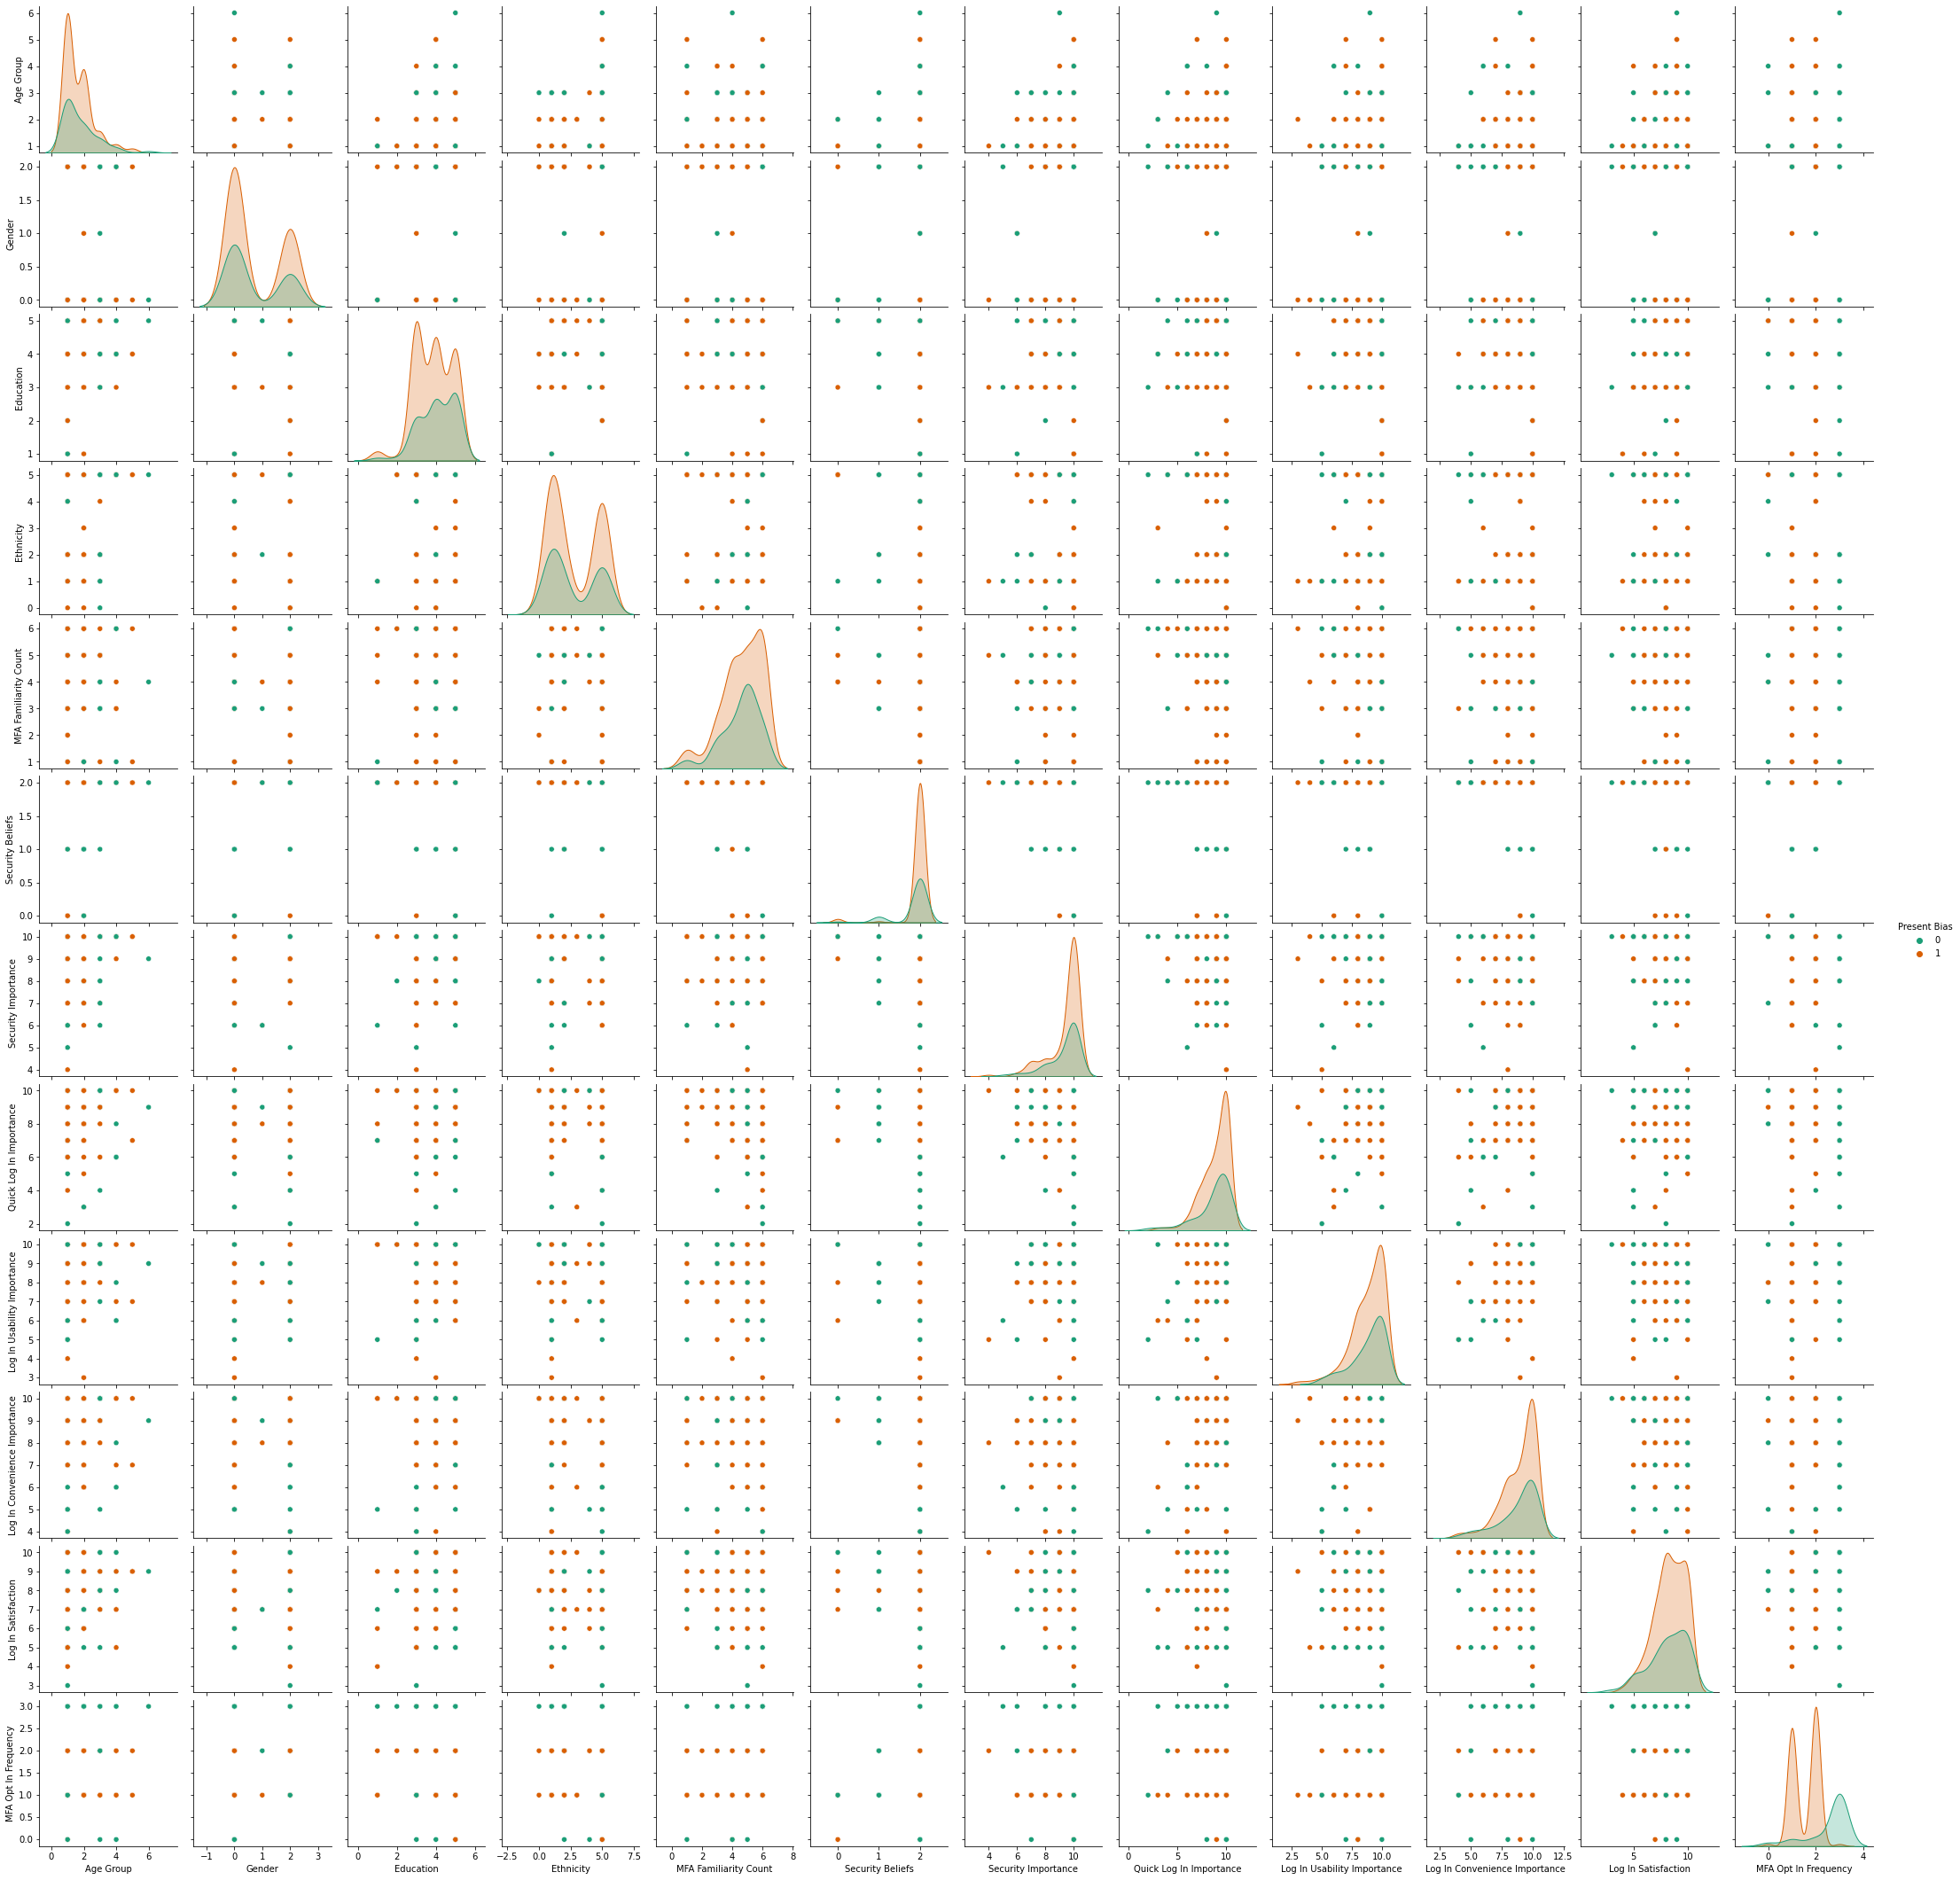

In [3]:
sns.pairplot(data, hue='Present Bias',palette='Dark2')

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop('Present Bias', axis = 1)
y = data['Present Bias']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [14]:
# train the model
from sklearn.svm import SVC

In [15]:
svc_model = SVC(C=10, gamma=0.01)

In [16]:
svc_model.fit(X_train, y_train)
print(svc_model.fit(X_train, y_train))

SVC(C=10, gamma=0.01)


In [17]:
# Model Evaluation

In [18]:
predictions = svc_model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_test,predictions))

[[13  2]
 [ 0 41]]


In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.95      1.00      0.98        41

    accuracy                           0.96        56
   macro avg       0.98      0.93      0.95        56
weighted avg       0.97      0.96      0.96        56



In [22]:
# not interested in the scores of labels that were not predicted, and then explicitly specify the 
# labels you are interested in (which are labels that were predicted at least once):
import sklearn.metrics as metrics
metrics.f1_score(y_test, predictions, average='weighted', labels=np.unique(predictions))

0.96343537414966

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [25]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [49]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [50]:
grid.best_estimator_

SVC(C=10, gamma=0.01)

In [51]:
grid_predictions = grid.predict(X_test)

In [52]:
print(confusion_matrix(y_test,grid_predictions))

[[13  7]
 [ 1 35]]


In [53]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.83      0.97      0.90        36

    accuracy                           0.86        56
   macro avg       0.88      0.81      0.83        56
weighted avg       0.87      0.86      0.85        56

